    Homework 06: RF_C50
    AMRUTHA KANAKATTE RAVISHANKAR
    CWID :20027346

In [253]:
#Importing the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [254]:
#Load teh data
df = pd.read_csv('wisc_bc_ContinuousVar.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [255]:
# Separate the features (X) and target (y)
X = df.drop(columns=['diagnosis']) 
y = df['diagnosis']

In [256]:
# Mapping the labels 
y = y.map({'M': 1, 'B': 0})

In [257]:
#Splitting teh data as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [258]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6.1
Use the C5.0 methodology to develop a classification model for the Diagnosis.  

In [259]:
#Initializing the model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [260]:
#Train the model on training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [261]:
# Make predictions on the test set
y_pred1= clf.predict(X_test)

In [262]:
# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred1)
accuracy = accuracy_score(y_test, y_pred1)
class_report = classification_report(y_test, y_pred1)

In [263]:
# Display results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[105   2]
 [  8  56]]

Accuracy: 94.15 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       107
           1       0.97      0.88      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



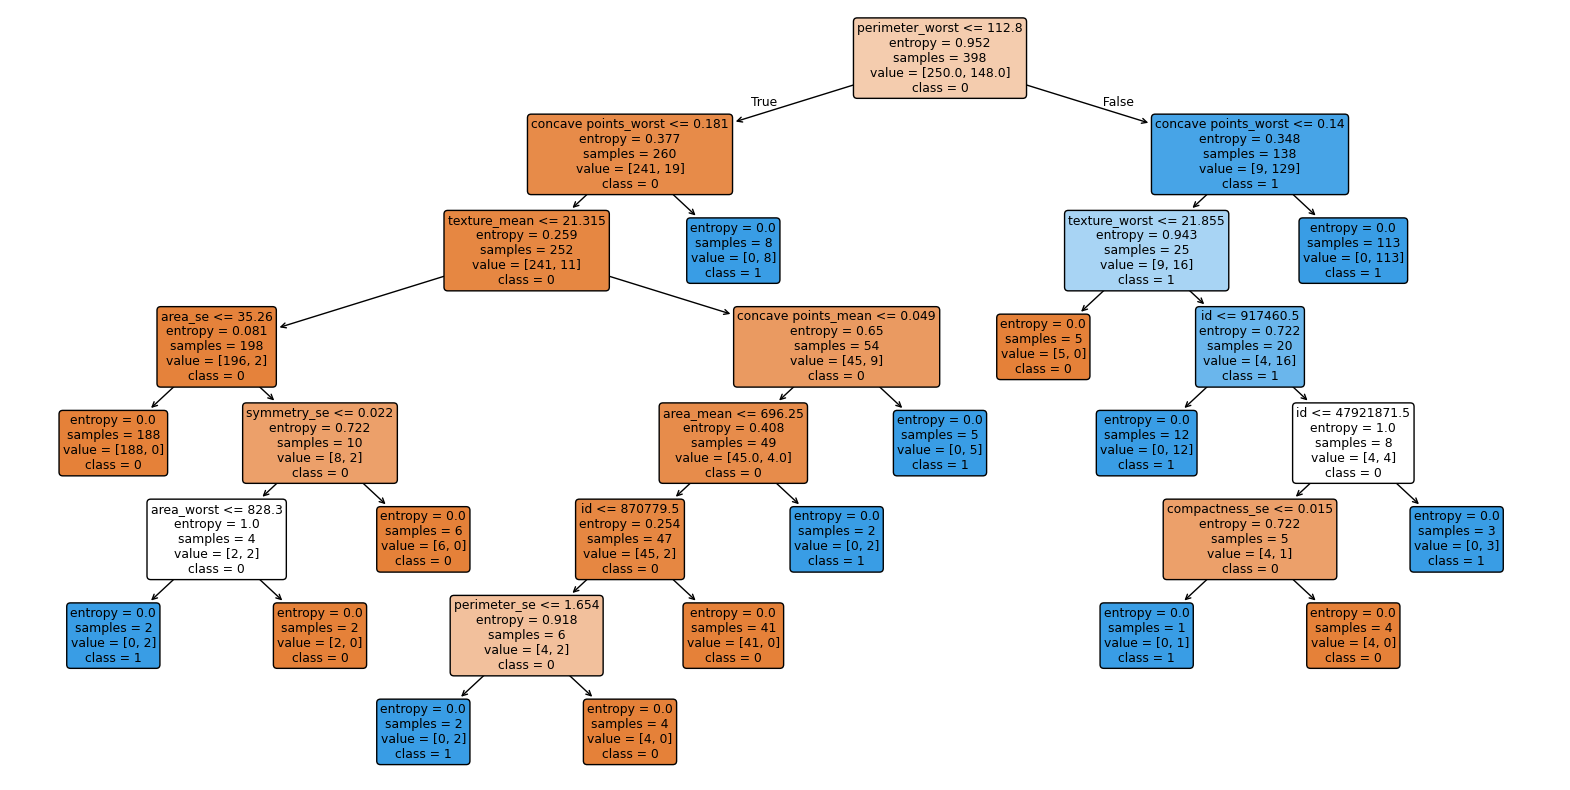

In [264]:
# Plot the tree
class_names = [str(cls) for cls in clf.classes_]
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()

6.2
Use the Random Forest methodology to develop a classification model for the Diagnosis and identify important features.

In [265]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [266]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [267]:
# Predictions
y_pred2 = rf_model.predict(X_test_scaled)

In [268]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy: 0.9708
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   0]
 [  5  59]]


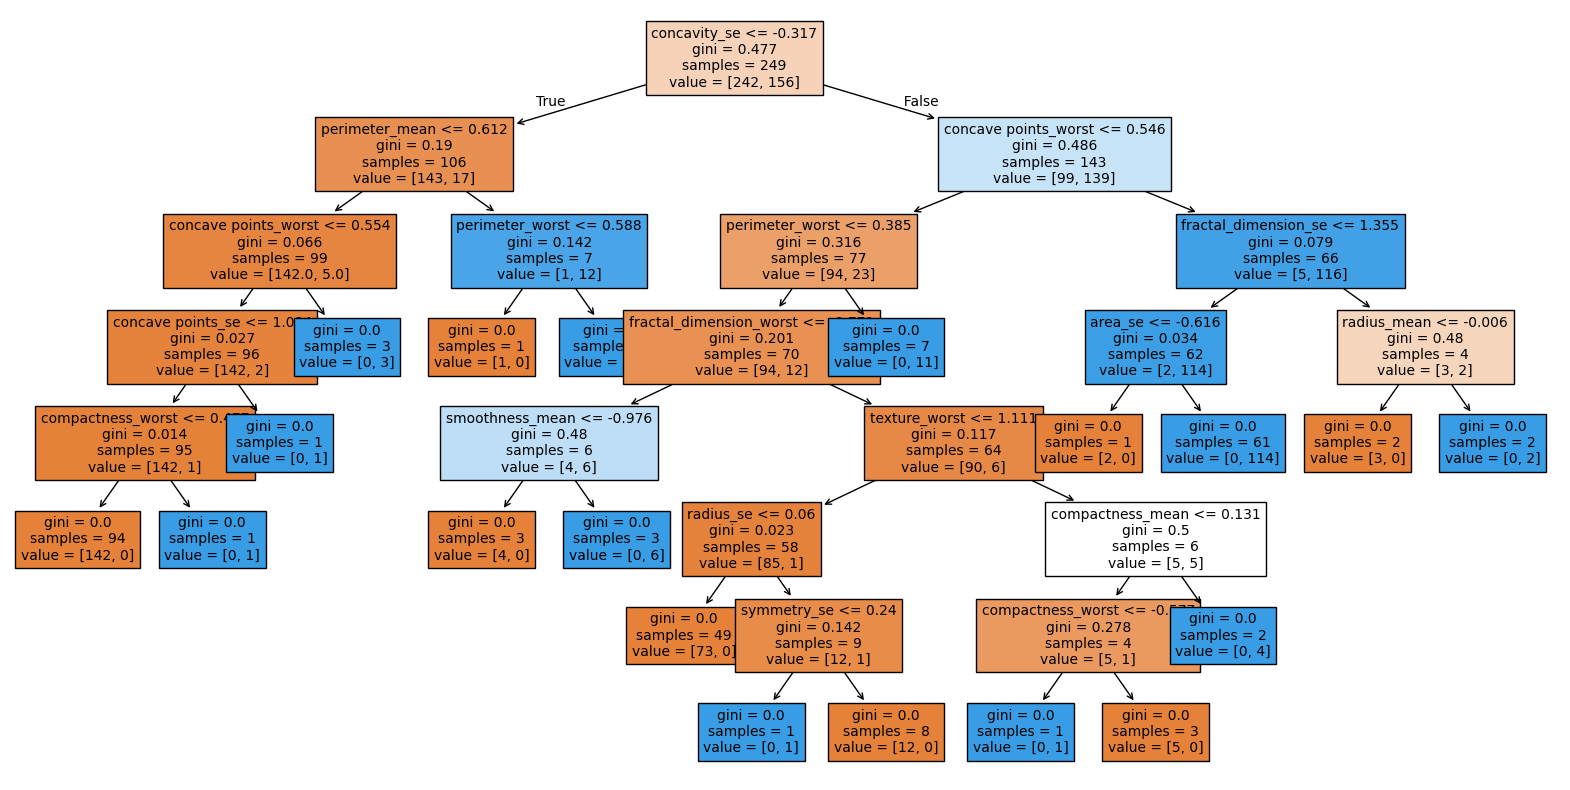

In [269]:
#Plot the tree
single_tree = rf_model.estimators_[0]  


plt.figure(figsize=(20, 10))
plot_tree(single_tree, fontsize=10, filled=True, feature_names=X.columns)
plt.show()

In [270]:
# Get feature importances
importance = rf_model.feature_importances_

In [271]:
# Create a DataFrame to display feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

In [272]:
# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

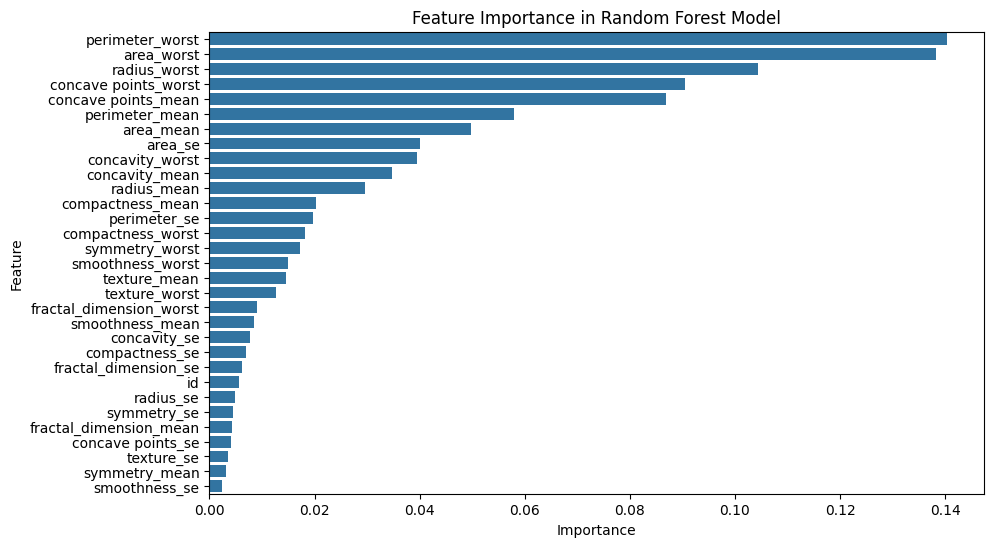

In [273]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [274]:
mean_decrease_accuracy = rf_model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = rf_model.feature_importances_ * rf_model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.00554111 0.02963516 0.01458306 0.05788817 0.0497111  0.00839465
 0.02020135 0.03468401 0.08694235 0.0032476  0.00421282 0.00483753
 0.00358614 0.01980376 0.03998255 0.00243137 0.00693748 0.00770393
 0.00408147 0.00447123 0.00628715 0.10431877 0.01269506 0.14043682
 0.13822147 0.01496719 0.01813618 0.03945856 0.09040367 0.01720021
 0.0089981 ]

Mean Decrease GINI= [0.0026412  0.01412574 0.00695108 0.02759266 0.02369503 0.00400135
 0.00962907 0.01653229 0.04144147 0.00154798 0.00200806 0.00230583
 0.00170935 0.00943955 0.01905787 0.00115892 0.00330678 0.00367212
 0.00194545 0.00213123 0.0029968  0.04972402 0.00605116 0.06693986
 0.0658839  0.00713418 0.0086447  0.0188081  0.04309133 0.00819856
 0.00428899]


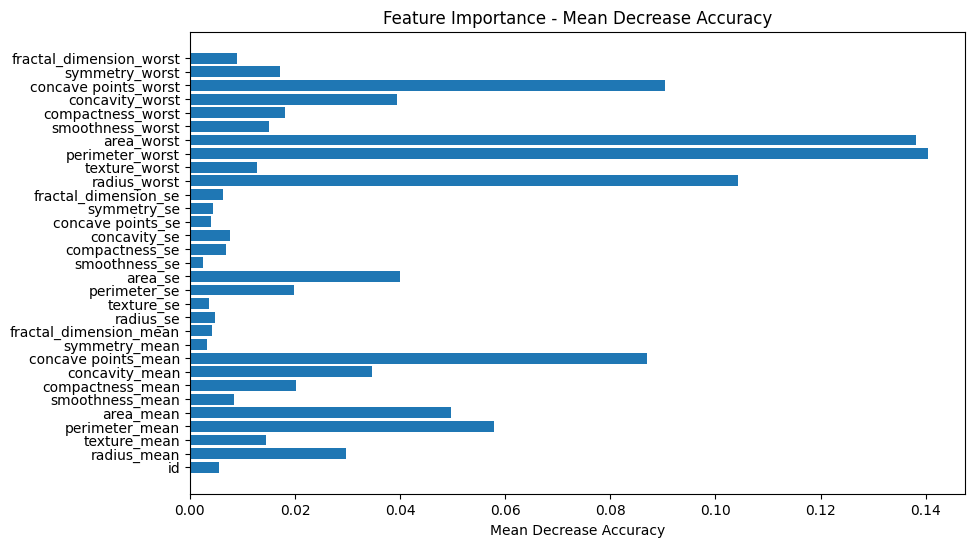

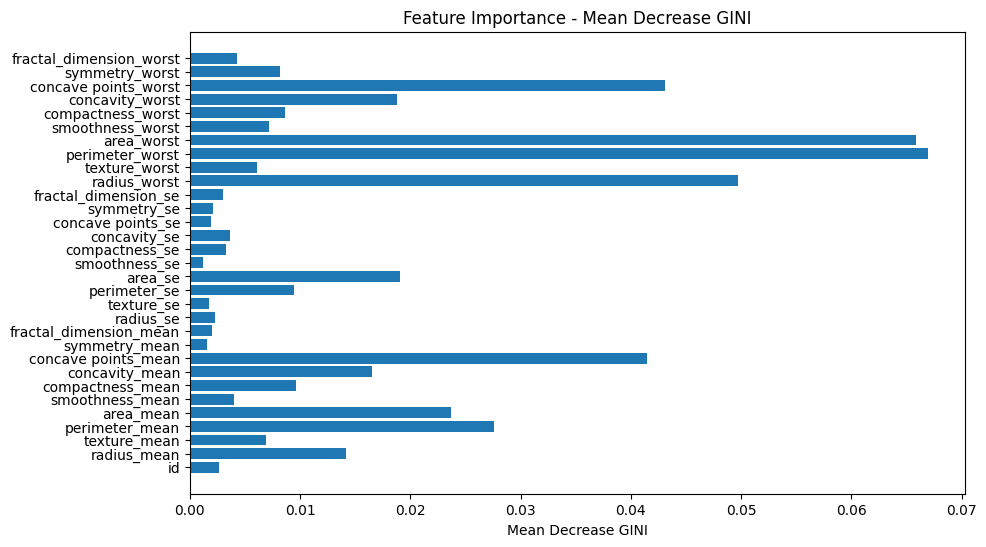

In [275]:
#Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), X.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), X.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()